# <p style="text-align:center;"> <font color='cyan'> Python for Data Science - Graded Project 3</font></p>

## <p style="text-align:center;"> <font color='Darkblue'>Loan Approval Predictor</font></p>

## <font color='red'> Problem Statement : </font>

### Context
 - Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas.          Customers first apply for a home loan after that company manually validates the customer eligibility for loan.
 - Company wants to automate the loan eligibility process based on customer detail provided while filling the details online.
 - They need a web application where a user can access their website and register, login, and enter the required details such as    Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the        eligibility for the home loan.

### Project Objective:
1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is      eligible for loan or not based on a given set of independent variable(s).

2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to    the website and then enter their details to check whether they are eligible for loan or not

### Dataset Description :

1. Loan ID :- Unique Loan ID
2. Gender :- Male or Female
3. Married :- Applicant married (Y/N)
4. Dependents :- Number of dependents
5. Self employed :- Self employed (Y/N)
6. Education :- Graduate/Undergraduate
7. Applicant Income :- Applicant income (in dollars)
8. Co Applicant Income :- Co Applicant Income (in dollars)
9. Loan Amount :- Loan amount in thousands (in dollars)
10. Loan Amount Term :- Term of loan in months
11. Credit History :- Credit history meets guidelines Yes/No(1/0)
12. Property area :- Urban/Semi Urban/Rural
13. Loan Status (Target) :- Loan Approved (Y/N)

## <font color='blue'> Load and explore data </font>

##  1. Import the required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import pickle

In [2]:
df = pd.read_csv('loan_approval_data.csv')

df.head()

loan_id gender married  dependents     education self_employed  \
0  lp001002   male      no         0.0      graduate            no   
1  lp001003   male     yes         1.0      graduate            no   
2  lp001005   male     yes         0.0      graduate           yes   
3  lp001006   male     yes         0.0  not graduate            no   
4  lp001008   male      no         0.0      graduate            no   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   credit_history property_area loan_status  
0             1.0         urban           y  
1             1.0         rural           n  
2             1.0         urban           y  
3             1.0         urban           y  
4             1.0         urban           y

##  2. Check the first few samples, shape, info of the data and try to familiarize yourself with               different features.

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.size

7982

In [6]:
df.ndim

2

In [7]:
df["loan_id"].ndim

1

In [8]:
df.describe().T

count         mean          std    min     25%     50%  \
dependents         599.0     0.762938     1.015216    0.0     0.0     0.0   
applicantincome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
coapplicantincome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
loanamount         592.0   146.412162    85.587325    9.0   100.0   128.0   
loan_amount_term   600.0   342.000000    65.120410   12.0   360.0   360.0   
credit_history     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
dependents            2.00      3.0  
applicantincome    5795.00  81000.0  
coapplicantincome  2297.25  41667.0  
loanamount          168.00    700.0  
loan_amount_term    360.00    480.0  
credit_history        1.00      1.0

In [9]:
df.describe(include = 'O')

loan_id gender married education self_employed property_area  \
count        614    601     611       614           582           614   
unique       614      2       2         2             2             3   
top     lp001002   male     yes  graduate            no     semiurban   
freq           1    489     398       480           500           233   

       loan_status  
count          614  
unique           2  
top              y  
freq           422

### Inference:
     - There are 614 entries and 13 columns in the loan_approval dataset.
     - The dataset consist of Integer, Object and Float data types.
     - Entire size of data is (614 x 13) = 7982
     - The dataframe is 2 dimentional (columns and rows); The entries of the column are 1 dimentional data
     - It is evident that there are some null entries also in some columns

## <font color='blue'> Data cleansing and Exploratory data analysis </font>

## 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [10]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [11]:
categorical_columns = df.select_dtypes('object')
numerical_columns = df.select_dtypes('float64')

for i in numerical_columns:
    df[i] = df[[i]].fillna(df[i].median())

for i in categorical_columns:
    df[i] = df[[i]].fillna(df[i].mode()[0])

In [12]:
df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### Checking if there are duplicate records and dropping redundant columns in the dataset.

In [13]:
len(df[df.duplicated()])

0

In [14]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [15]:
df.drop('loan_id', axis = 1, inplace = True)

In [16]:
df.head()

gender married  dependents     education self_employed  applicantincome  \
0   male      no         0.0      graduate            no             5849   
1   male     yes         1.0      graduate            no             4583   
2   male     yes         0.0      graduate           yes             3000   
3   male     yes         0.0  not graduate            no             2583   
4   male      no         0.0      graduate            no             6000   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  property_area loan_status  
0         urban           y  
1         rural           n  
2         urban           y  
3         urban           y  
4         urban           y

## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [17]:
df.dtypes

gender                object
married               object
dependents           float64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

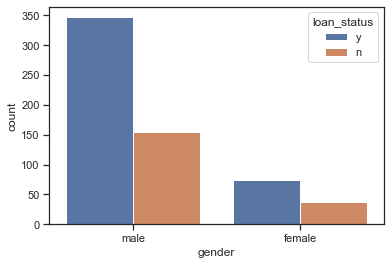

In [18]:
sns.countplot(x = 'gender', hue = 'loan_status', data = df)

<AxesSubplot:xlabel='married', ylabel='count'>

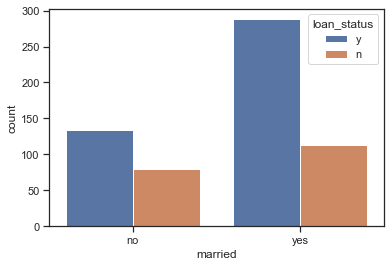

In [19]:
sns.countplot(x = 'married', hue = 'loan_status', data = df)

<AxesSubplot:xlabel='education', ylabel='count'>

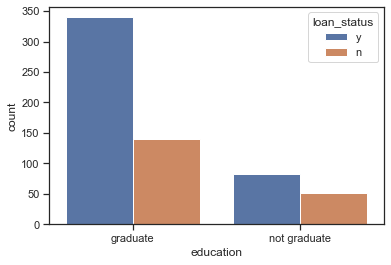

In [20]:
sns.countplot(x = 'education', hue = 'loan_status', data = df)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

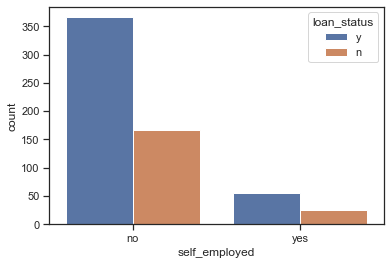

In [21]:
sns.countplot(x = 'self_employed', hue = 'loan_status', data = df)

<AxesSubplot:xlabel='property_area', ylabel='count'>

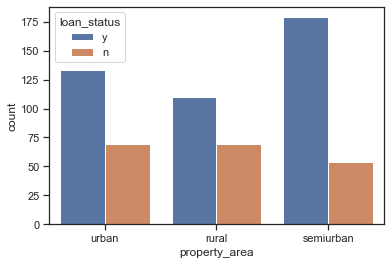

In [22]:
sns.countplot(x = 'property_area', hue = 'loan_status', data = df)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

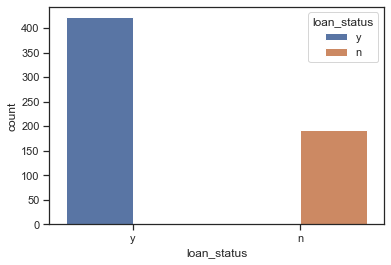

In [23]:
sns.countplot(x = 'loan_status', hue = 'loan_status', data = df)

### Observations made from above visual distributions :
     - The number of loans approved is higher than rejection in the given dataset.
     - The most preferred property area for loan approval is semi-urban followed by urban and rural areas.
     - Loans approved for non self-employed are around 7 times more than loans approved for self-employed.
     - Loans approved for Graduates are around 3 times more than loans approved for non-graduates.
     - Those who are married have secured more loans than those who are not married.
     - Loans approved for males are higher than females in the given dataset.

## <font color='blue'> Data Preparation for model building </font>

## 5. Encode the categorical data.

In [24]:
lab_enc = LabelEncoder()
for i in df.select_dtypes('object'):
    df[i] = lab_enc.fit_transform(df[i])
    
df.head()

gender  married  dependents  education  self_employed  applicantincome  \
0       1        0         0.0          0              0             5849   
1       1        1         1.0          0              0             4583   
2       1        1         0.0          0              1             3000   
3       1        1         0.0          1              0             2583   
4       1        0         0.0          0              0             6000   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   property_area  loan_status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

## 6. Separate the target and independent features and split the data into train and test.

In [25]:
X = df.drop('loan_status', axis = 1)
Y = df['loan_status']

In [26]:
X.head()

gender  married  dependents  education  self_employed  applicantincome  \
0       1        0         0.0          0              0             5849   
1       1        1         1.0          0              0             4583   
2       1        1         0.0          0              1             3000   
3       1        1         0.0          1              0             2583   
4       1        0         0.0          0              0             6000   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   property_area  
0              2  
1              0  
2              2  
3              2  
4              2

In [27]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int32

### Split the data into train and test.

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [29]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train.iloc[:,:])
X_test = ss.fit_transform(X_test.iloc[:,:])

## <font color='blue'> Model building and Creating pickle </font>

## 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [30]:
def mdl(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, prediction)
    return accuracy

In [31]:
logr = LogisticRegression()
ls = pd.DataFrame()

score = mdl(logr, X_train, X_test, Y_train, Y_test)
print("The r2_score is : ", score)

The r2_score is :  0.7945945945945946


In [32]:
ls['Logistic_regression'] = pd.Series(score)
ls

Logistic_regression
0             0.794595

### Create a pickle file

In [34]:
pickle.dump(logr, open('model.pk', 'wb'))

## <font color='blue'> Python Flask Application development </font>

## Creating a Project and Virtual Environment using Pycharm/VS code and installing required packages.

 - This is our main application file that is designed to call some of the implemented APIs and methods, such as connecting to      the MYSQL database and creating a table for the database, and APIs such as user to register, login, enter_details, predict,      and logout.
 
 -> Connect to the MYSQL database and create the class for the table : User(id, username, password) (can create the table  in the database using mysql workbench also)
 -> Register: This is a register API. This should take username and password and store the details in the user database.
 -> Login: This API should take the username and password of registered users and successfully log them in.
 -> Enter Details: This API should render the ‘predict.html’ page, where the user has to enter their details to check the  loan eligibility.
 -> Predict: This API should render the prediction results on the HTML template.
 -> Logout: This API should logout the user.

### a) Create a basic HTML form for the frontend

Create a file *Index.html* in the templates folder and copy the following code.

Create a file *Predict.html* in the templates folder and copy the following code.

## Create *app.py* file and write the Predict function.

# <p style="text-align:center;"><font color='red'>Screenshots</font></p>

## <p style="text-align:center;">Web Application Started</p>

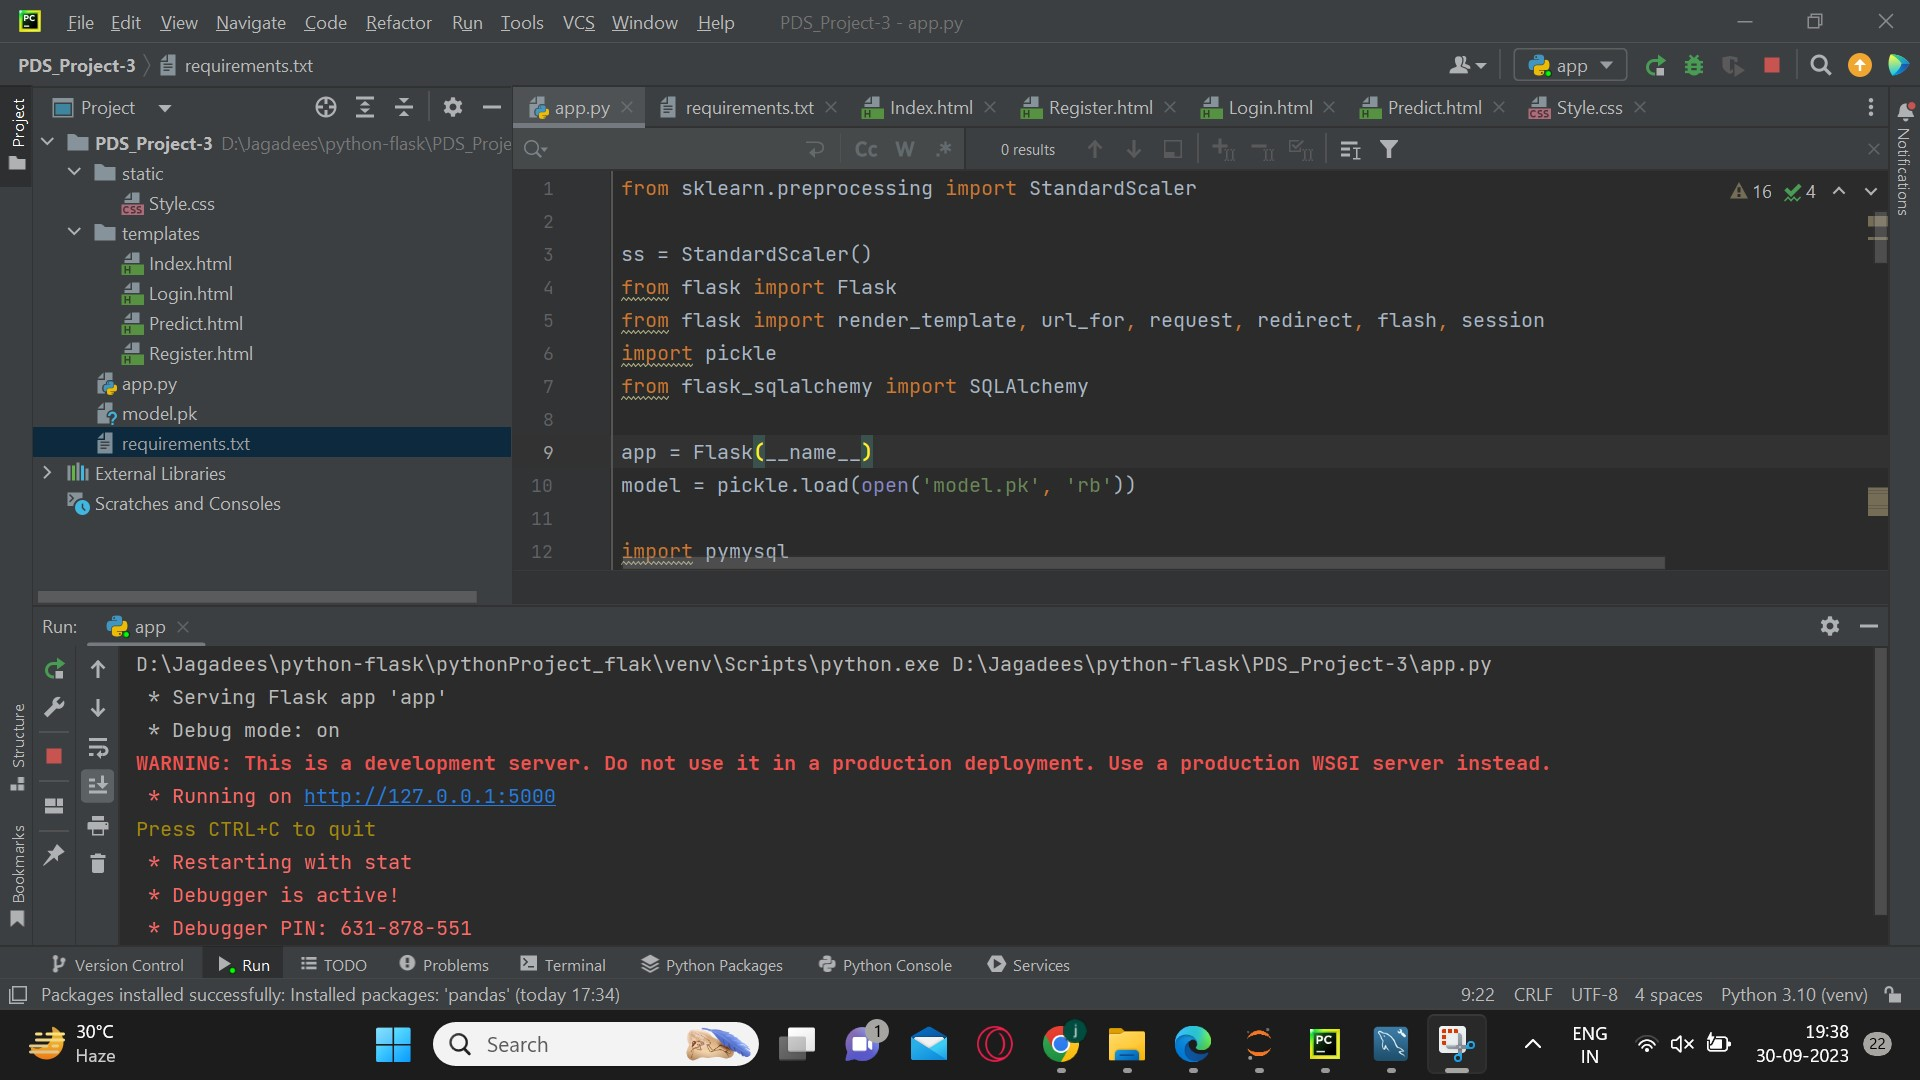

## <p style="text-align:center;">MySql workbench with 'User' table for creds.</p>

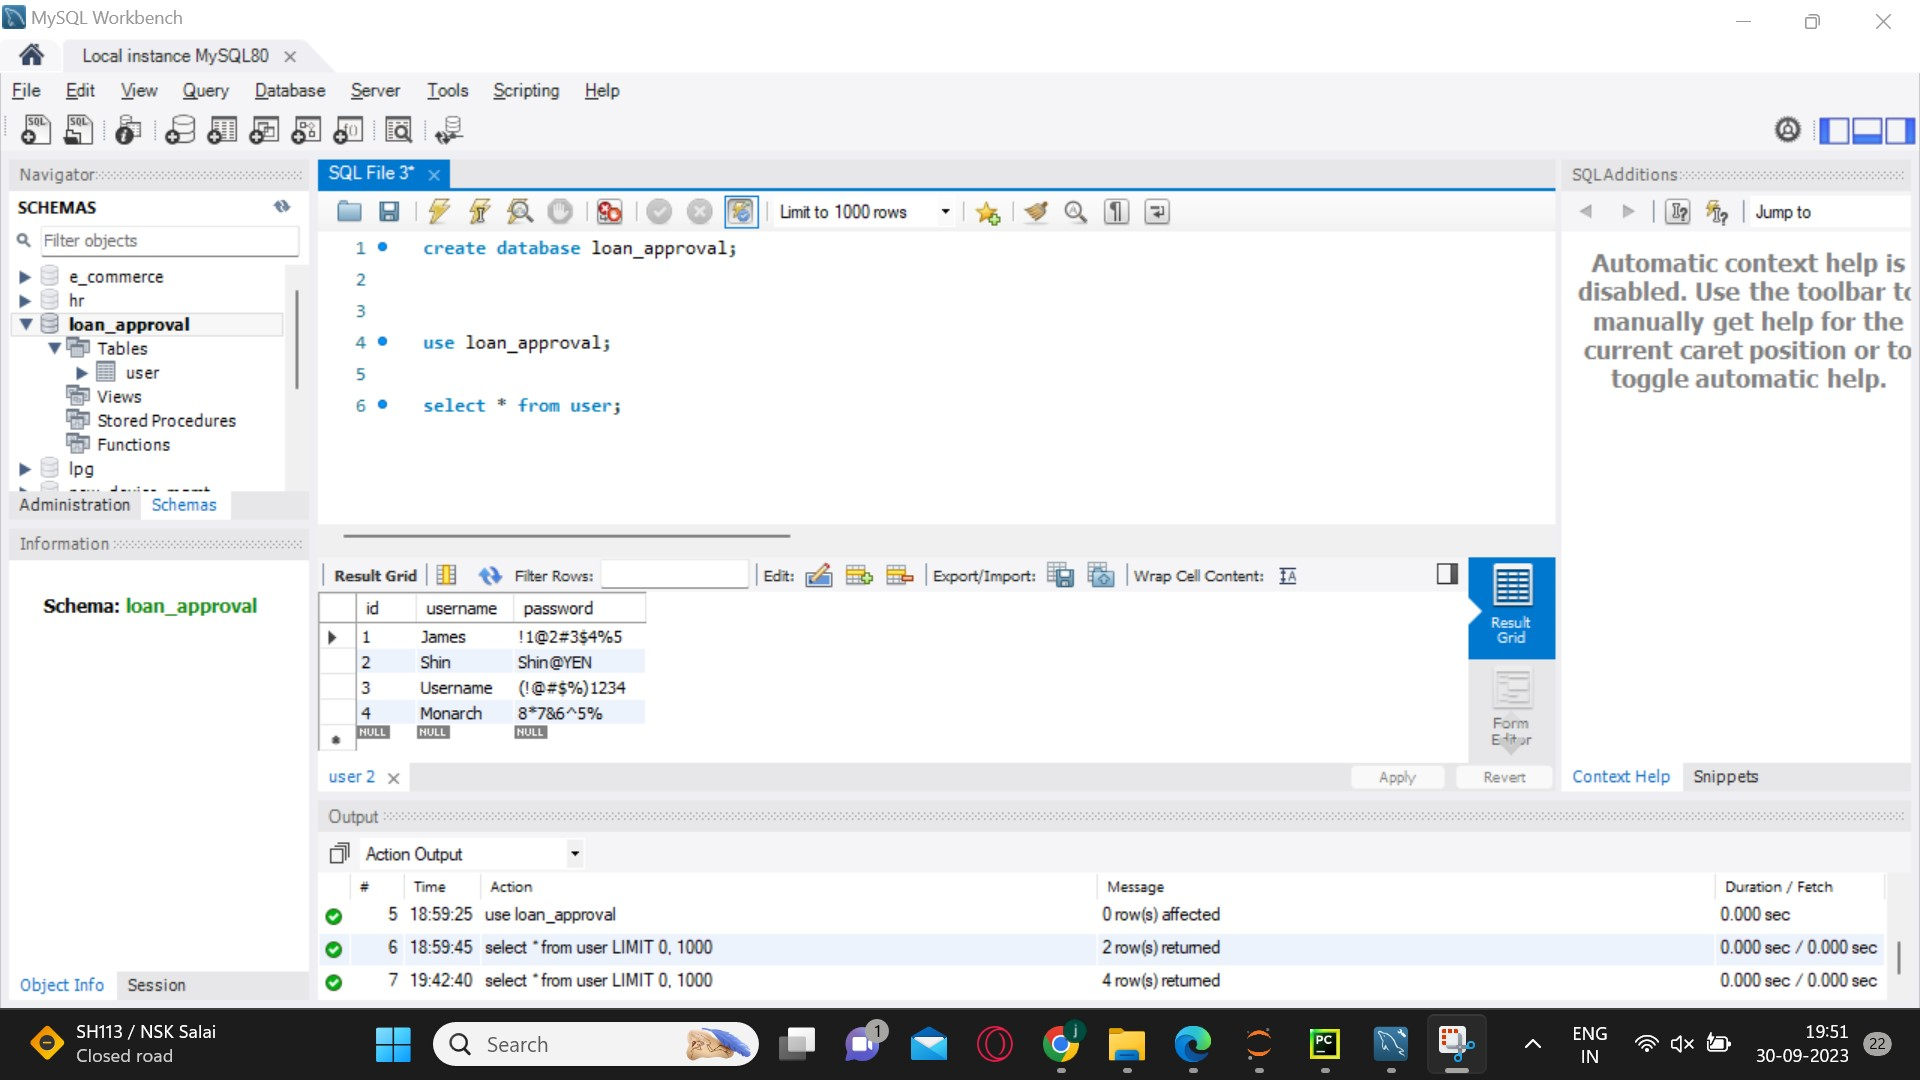

## <p style="text-align:center;">Home Page</p>

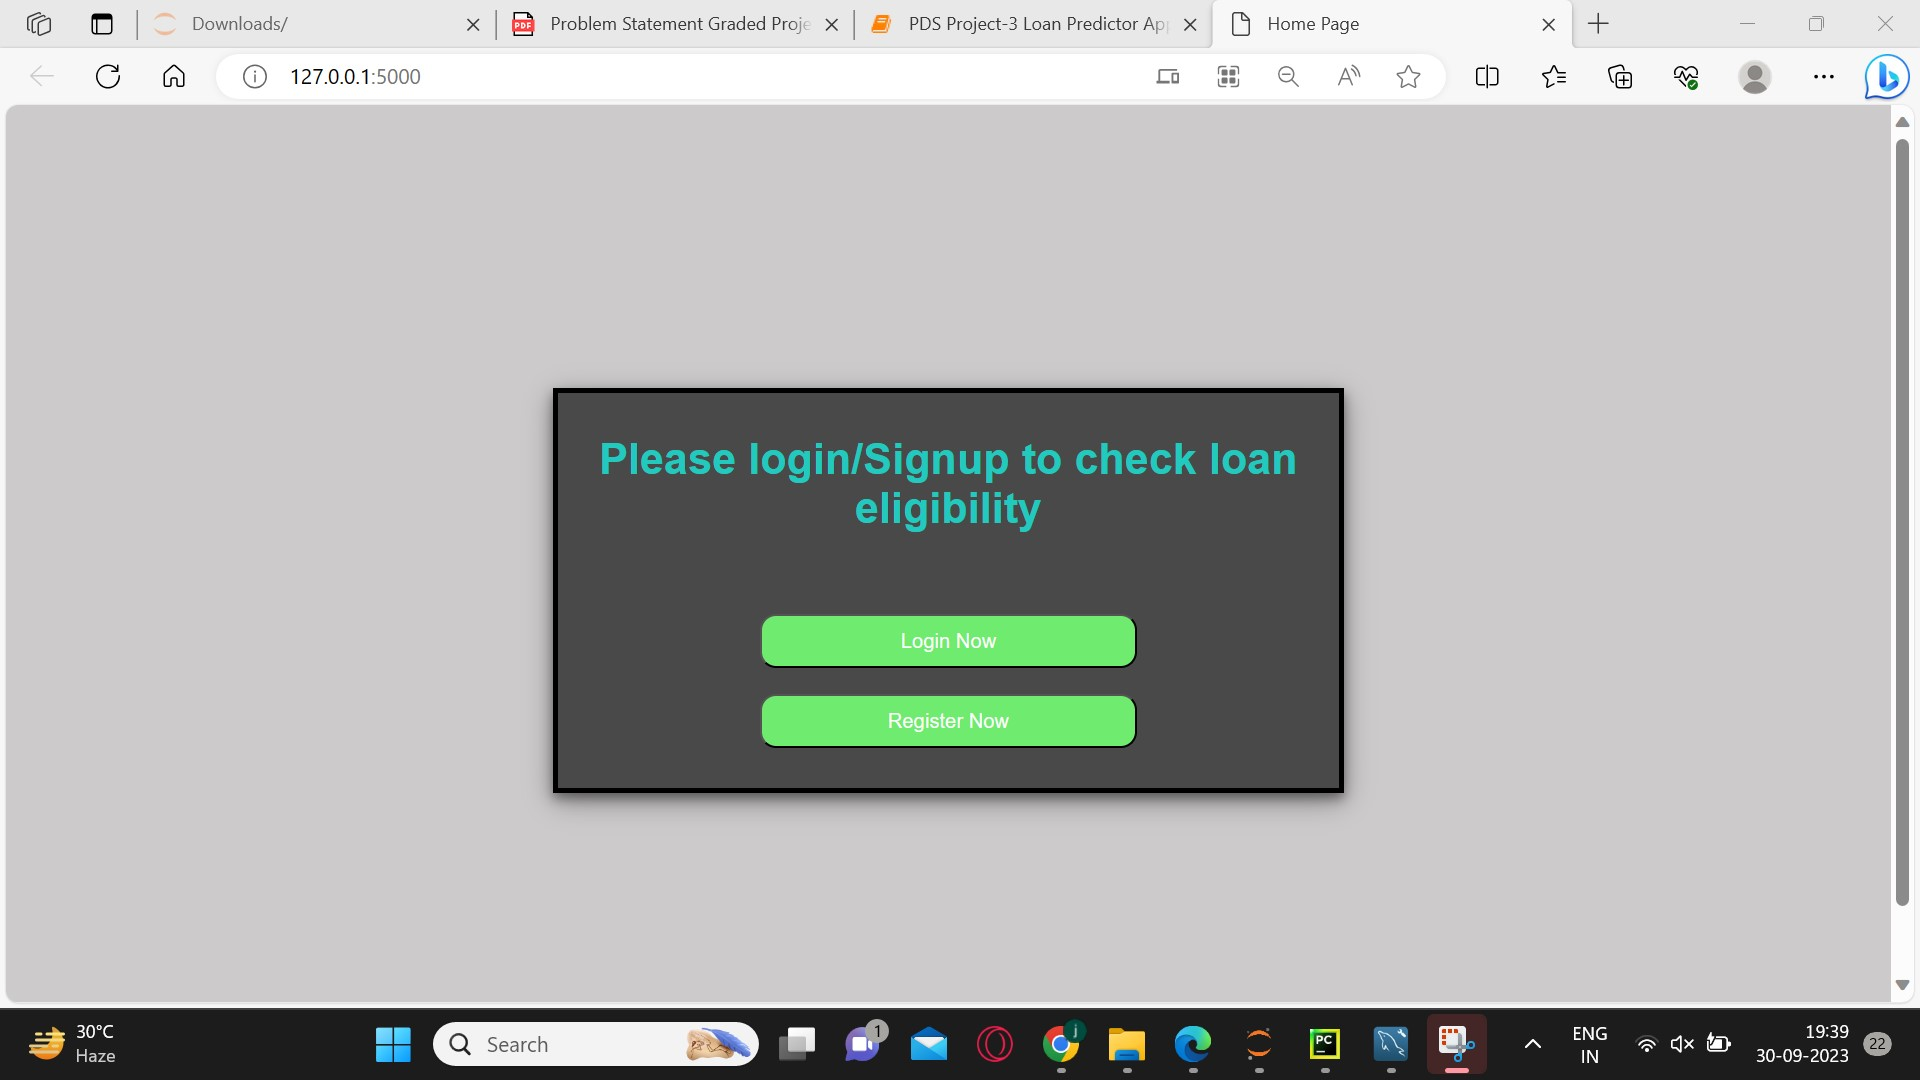

## <p style="text-align:center;">Register Page</p>

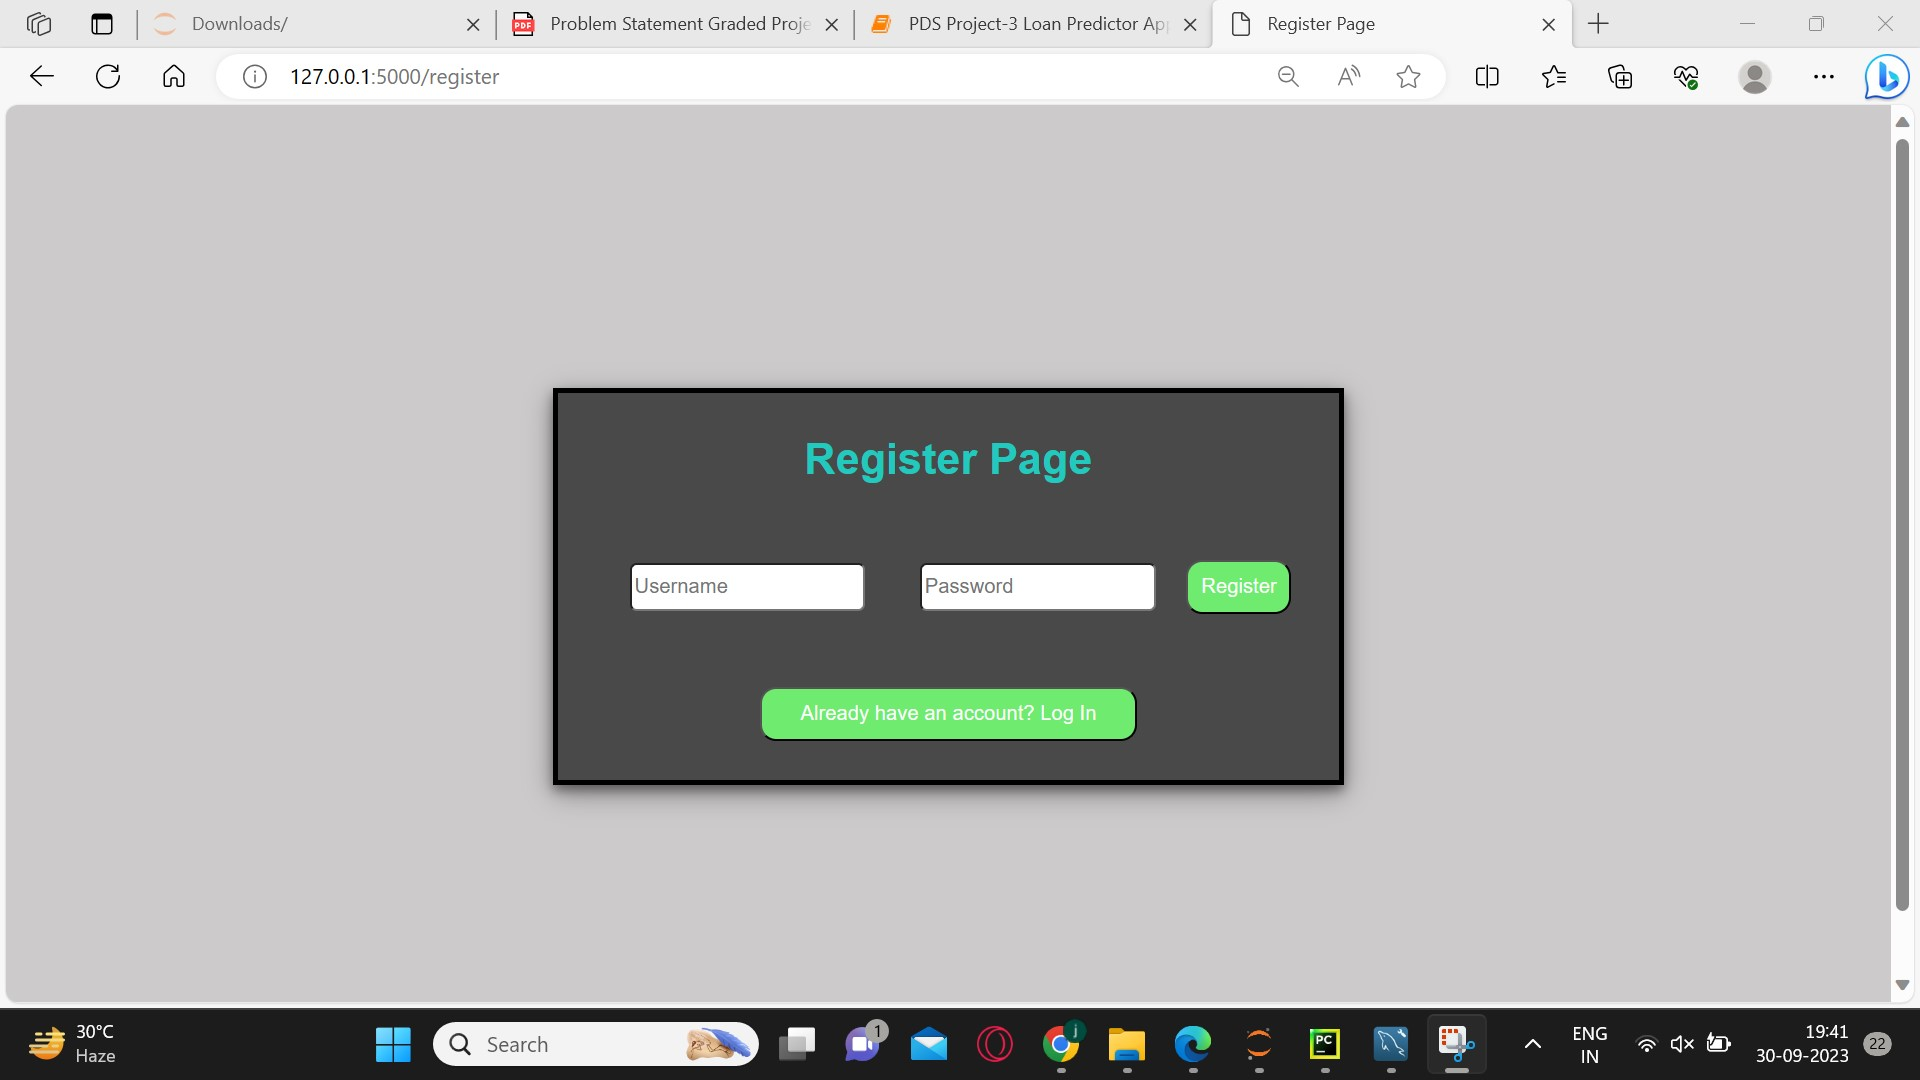

## <p style="text-align:center;">Registration Successful</p>

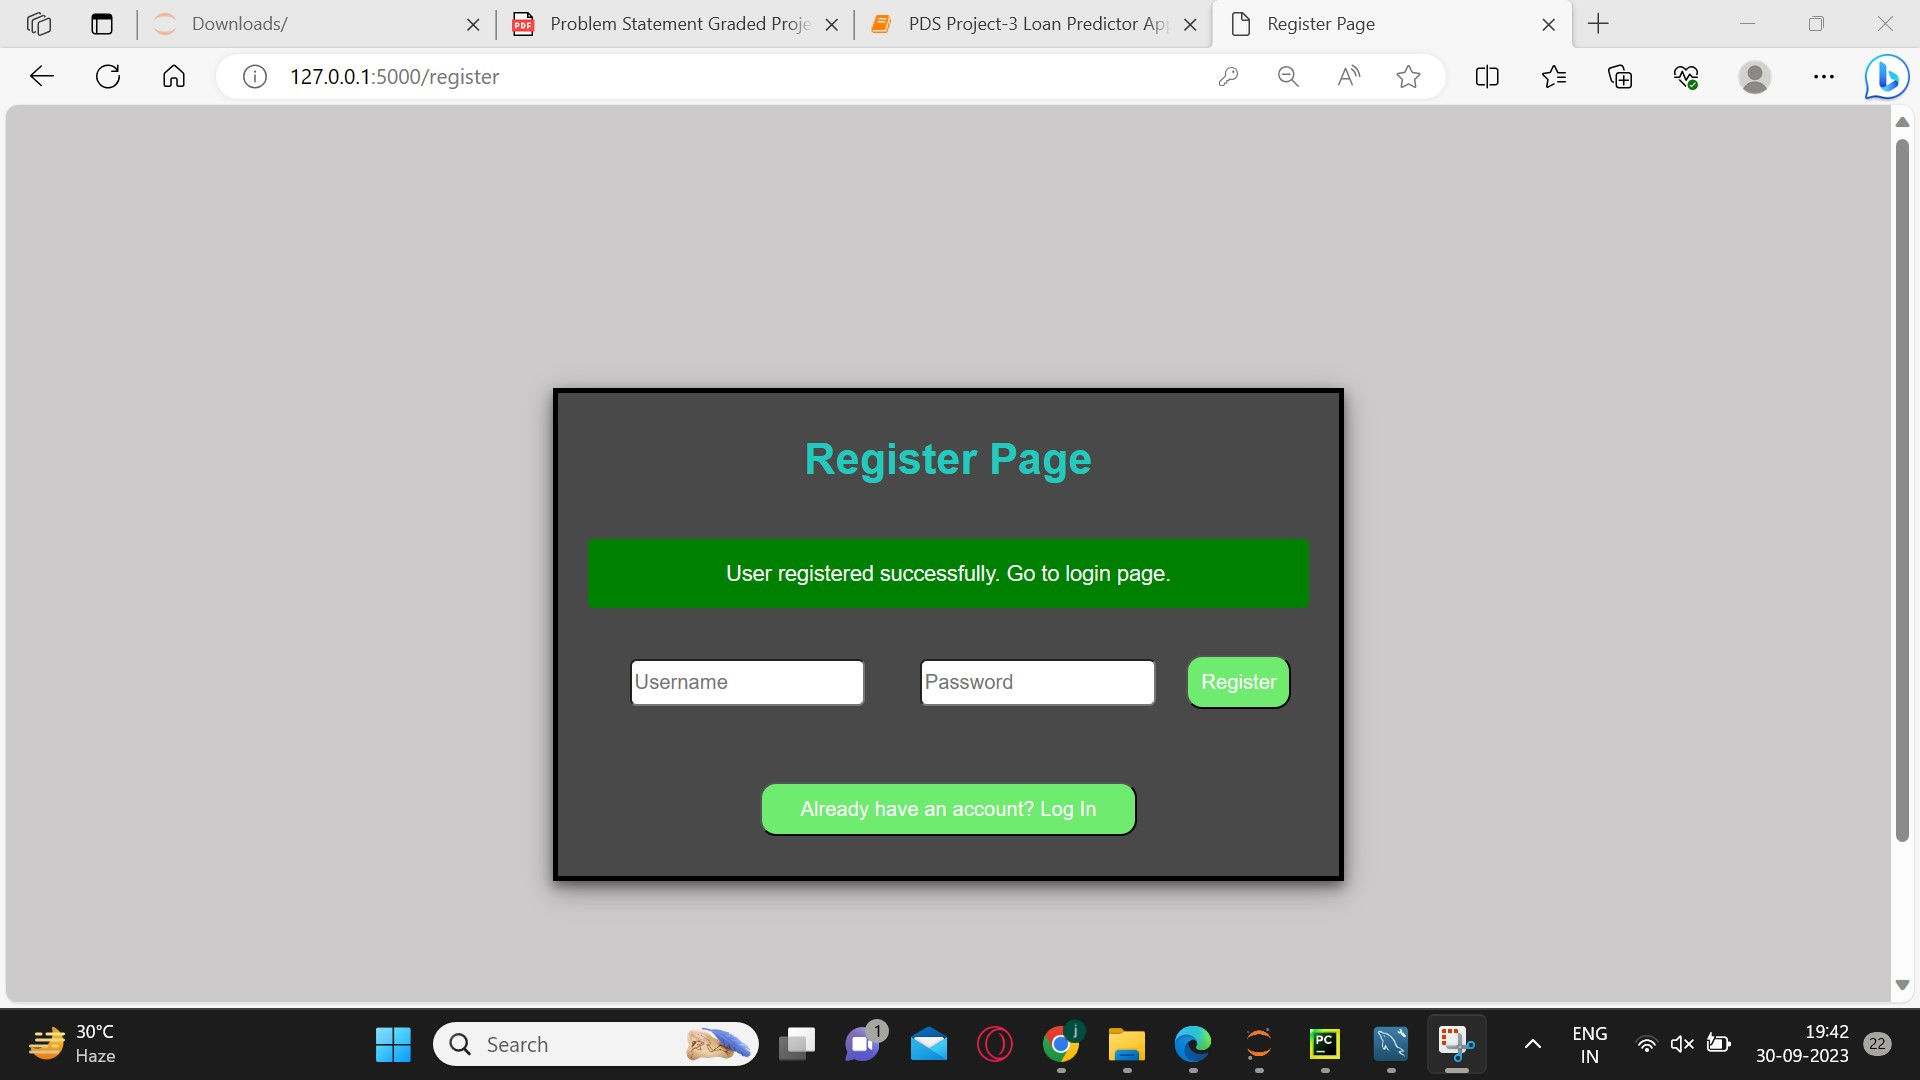

## <p style="text-align:center;">Registration Error</p>

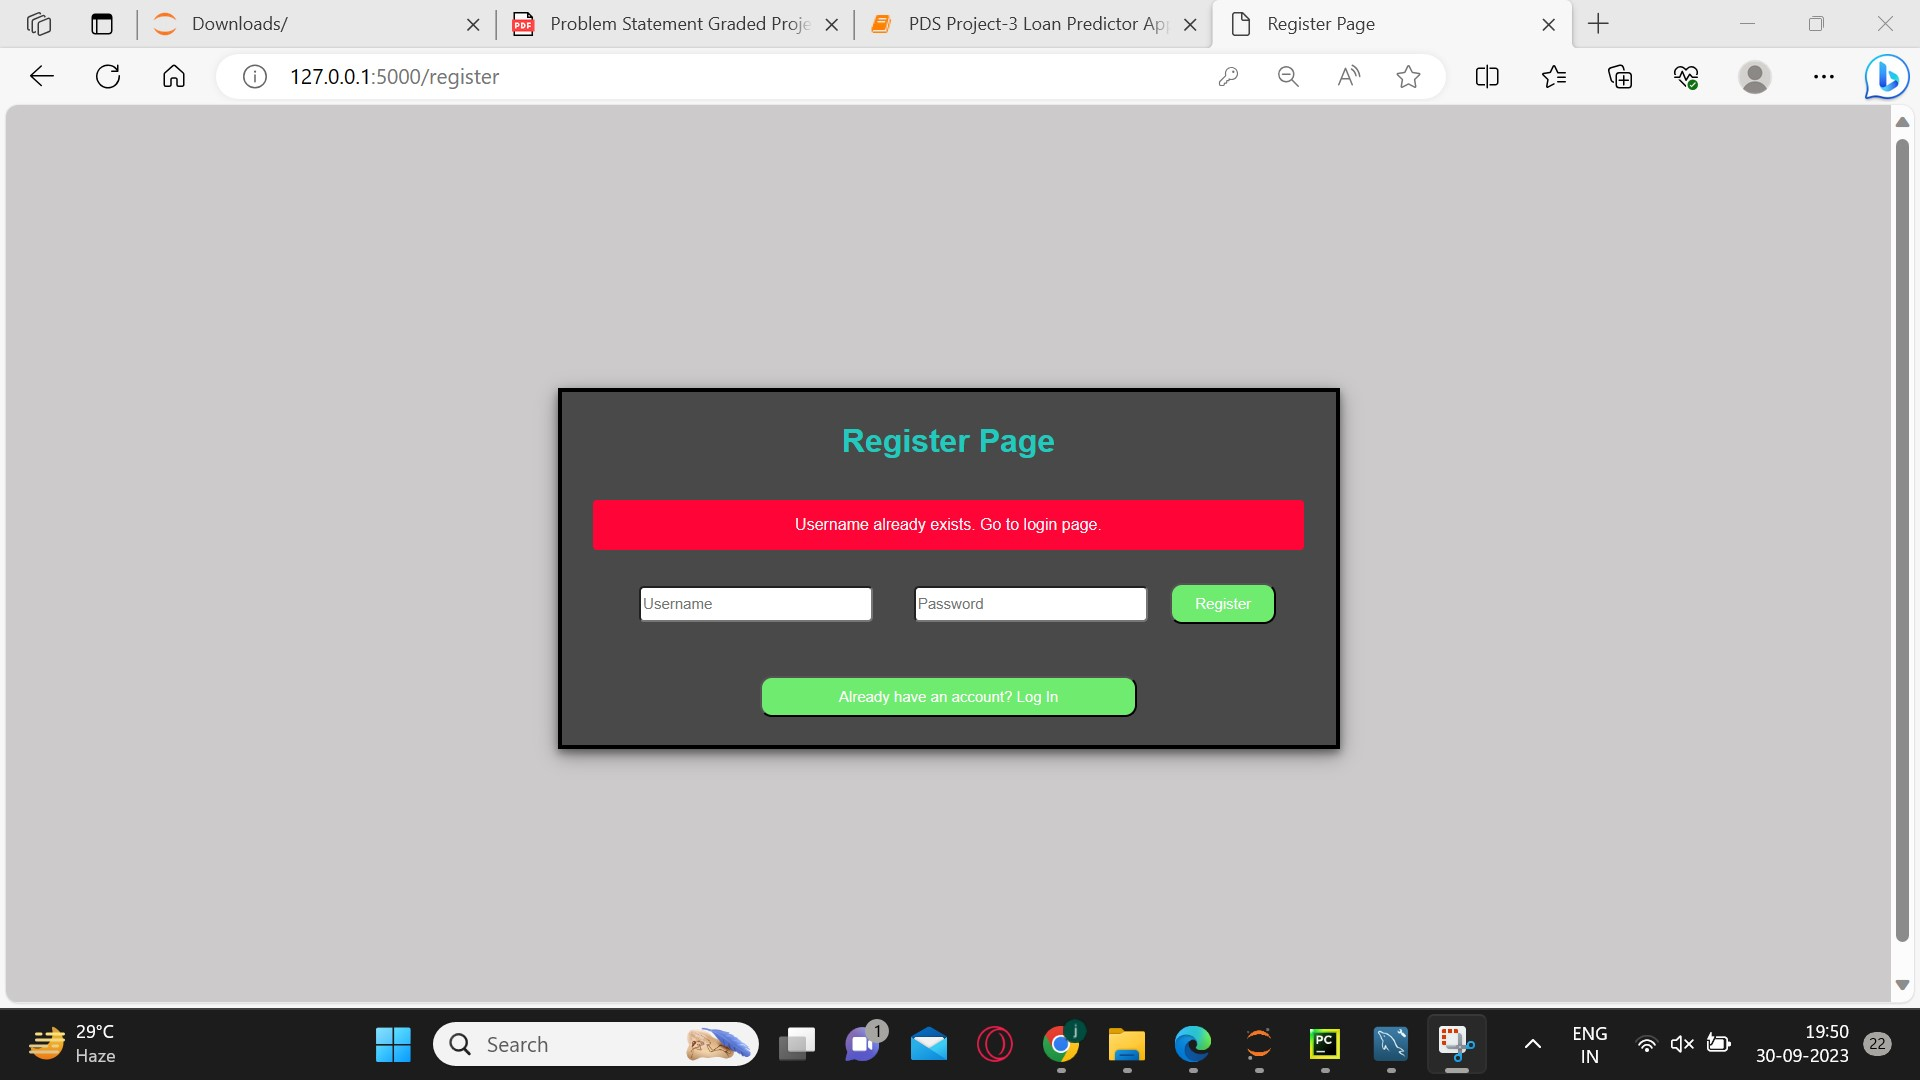

## <p style="text-align:center;">Login Page</p>

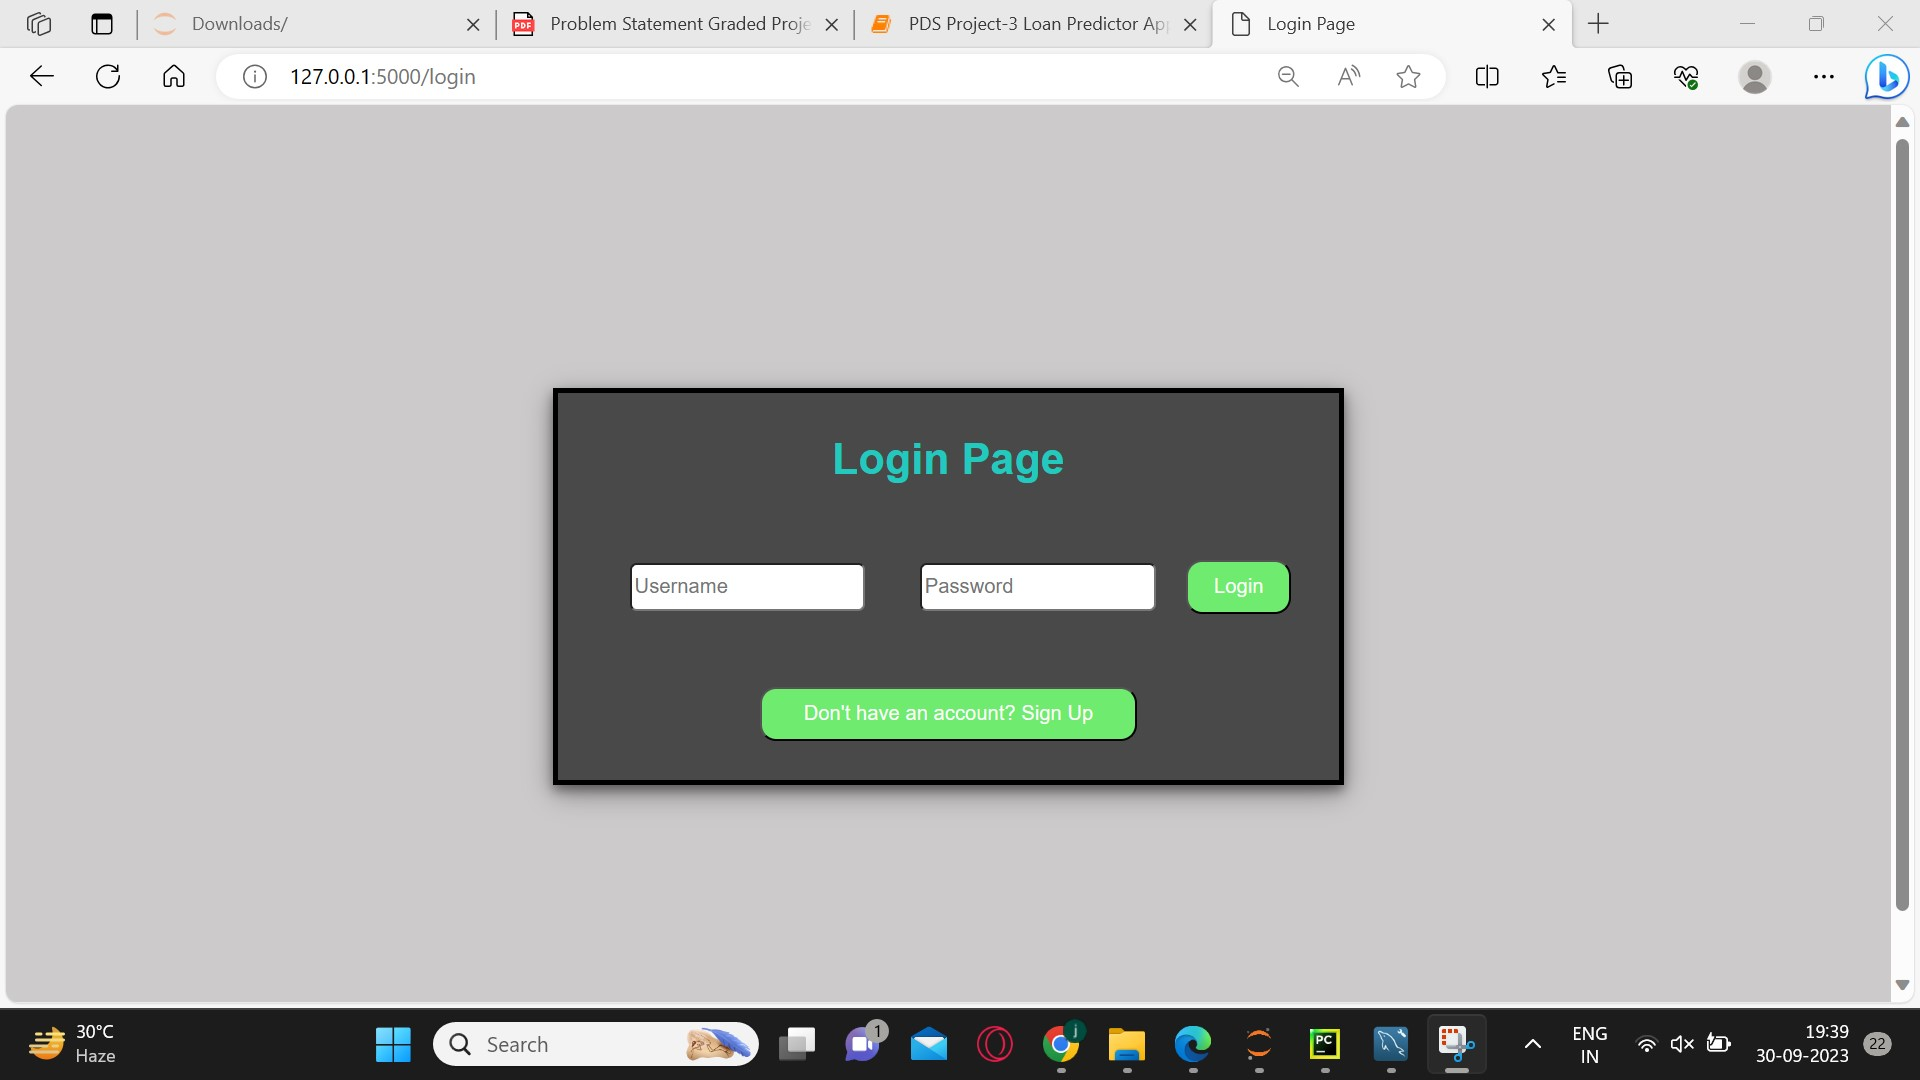

## <p style="text-align:center;">Invalid Username or Password</p>

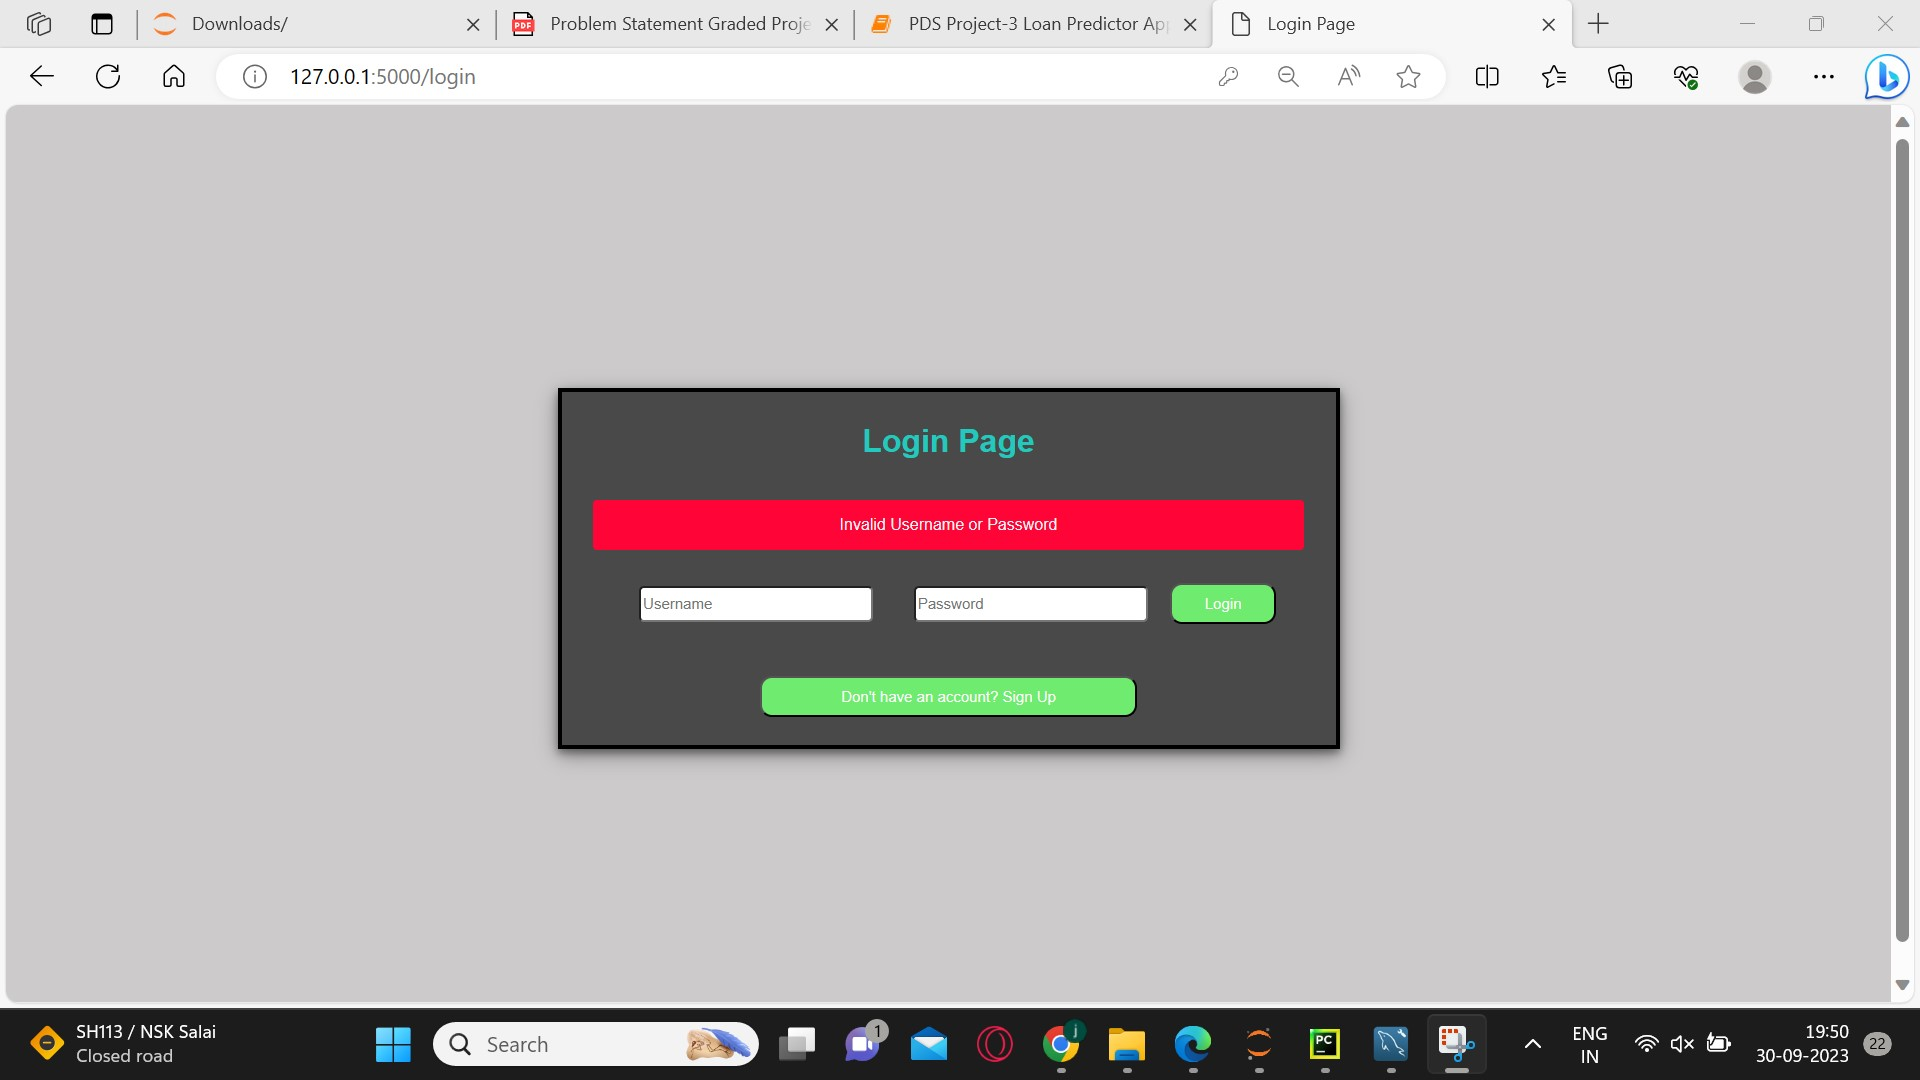

## <p style="text-align:center;">After Successful Login: Prediction Page</p>

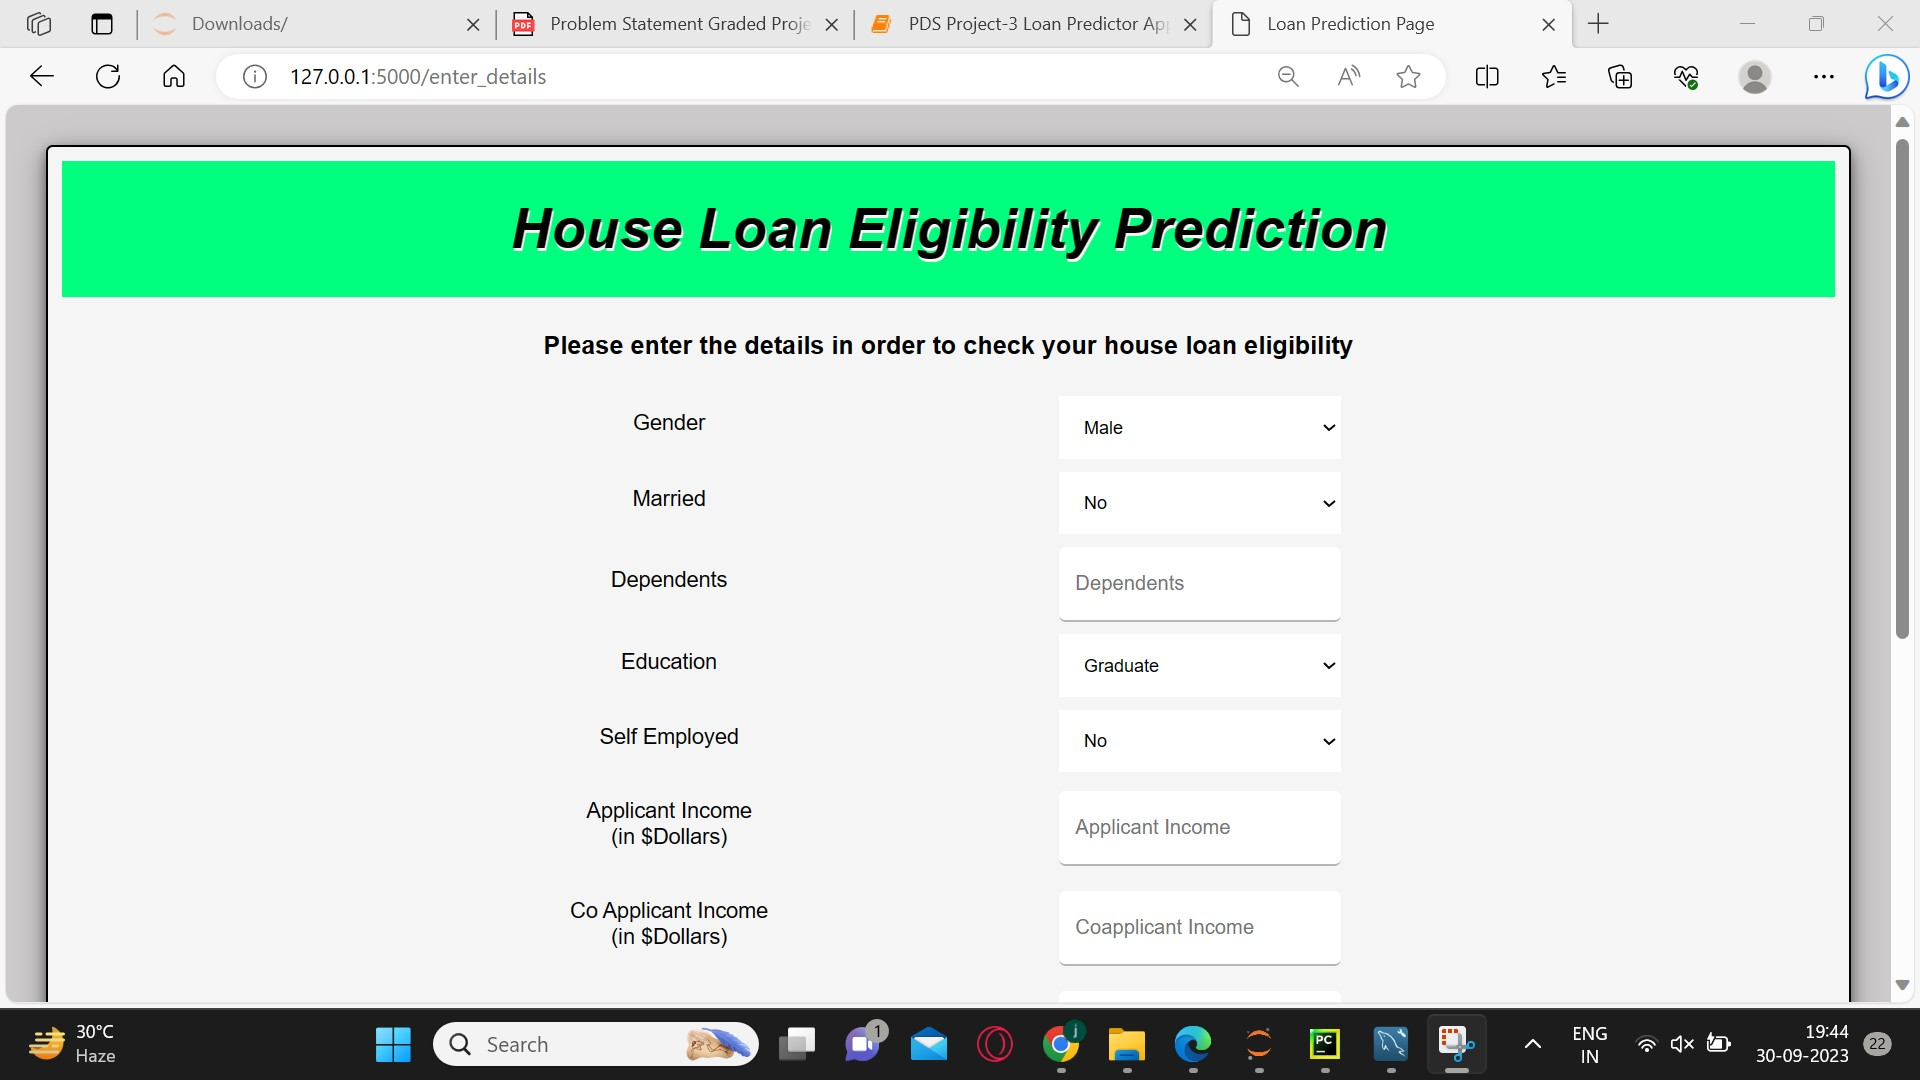

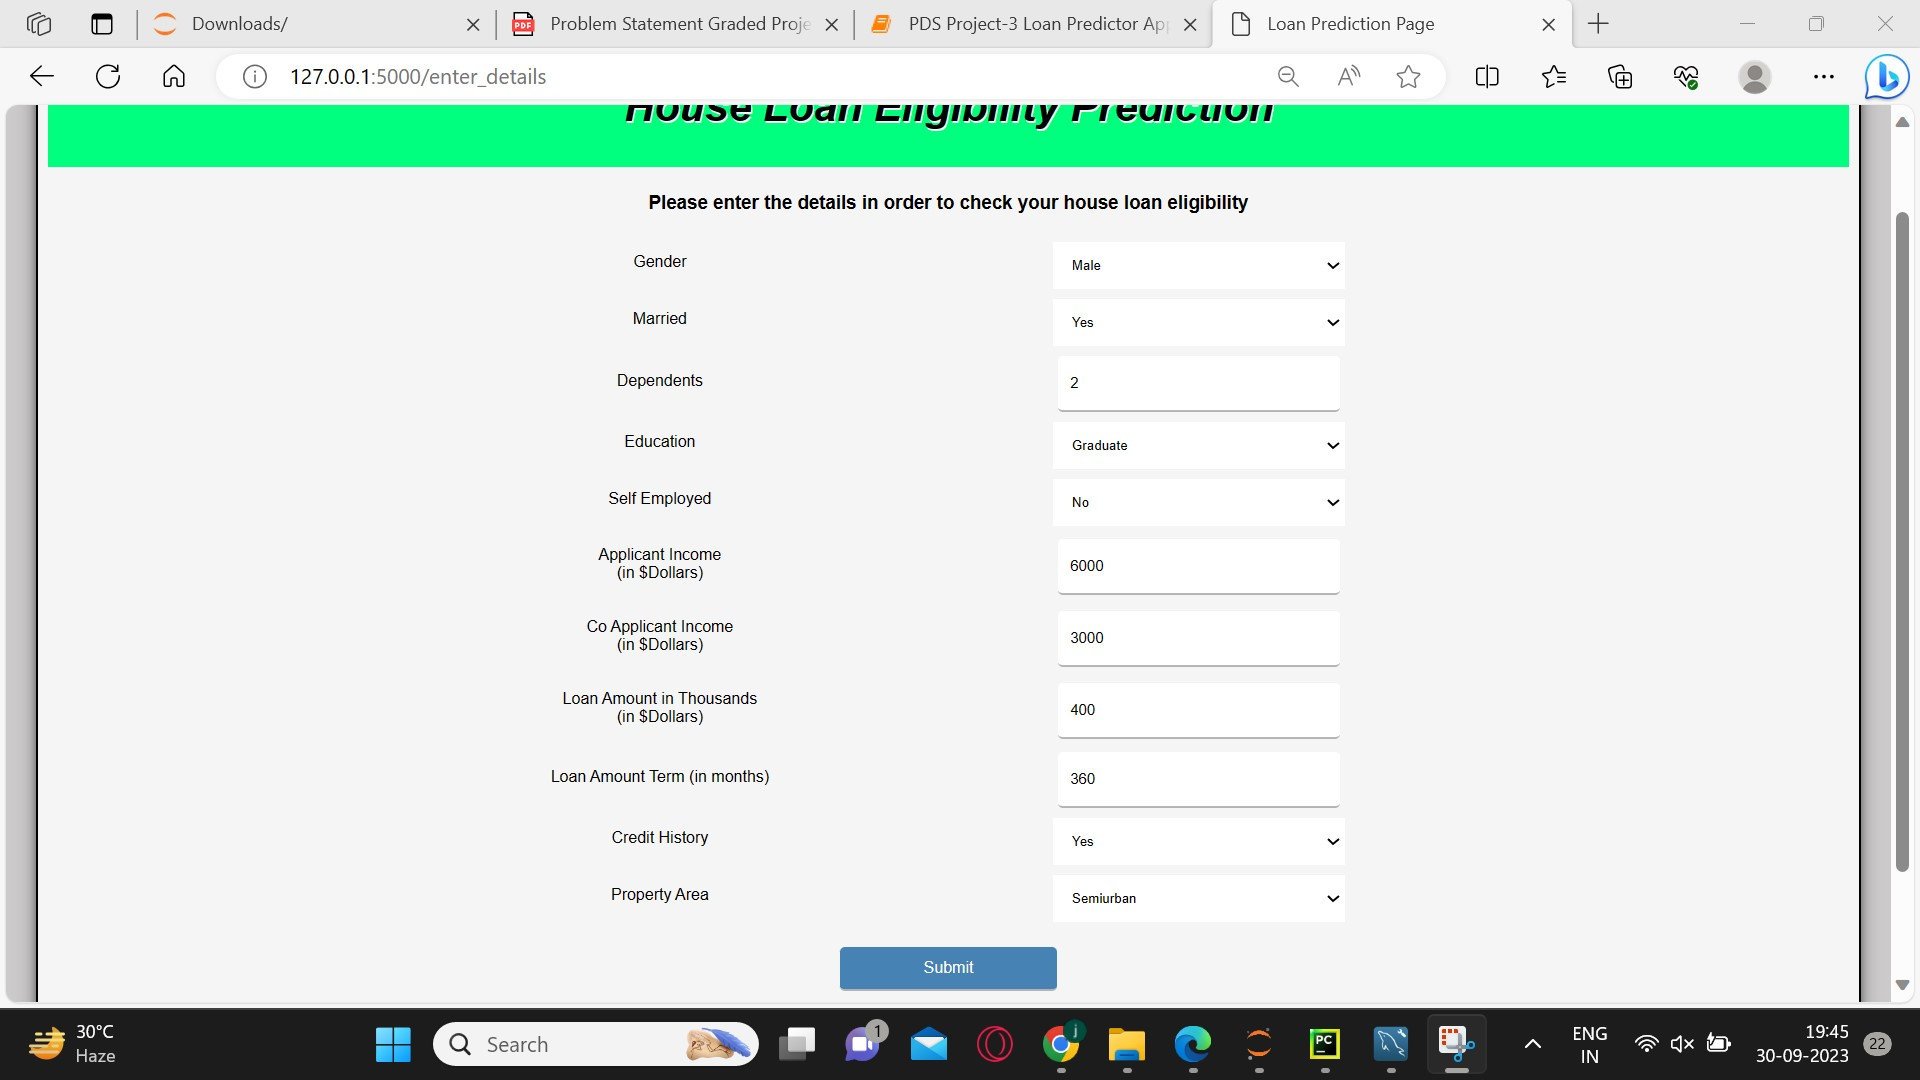

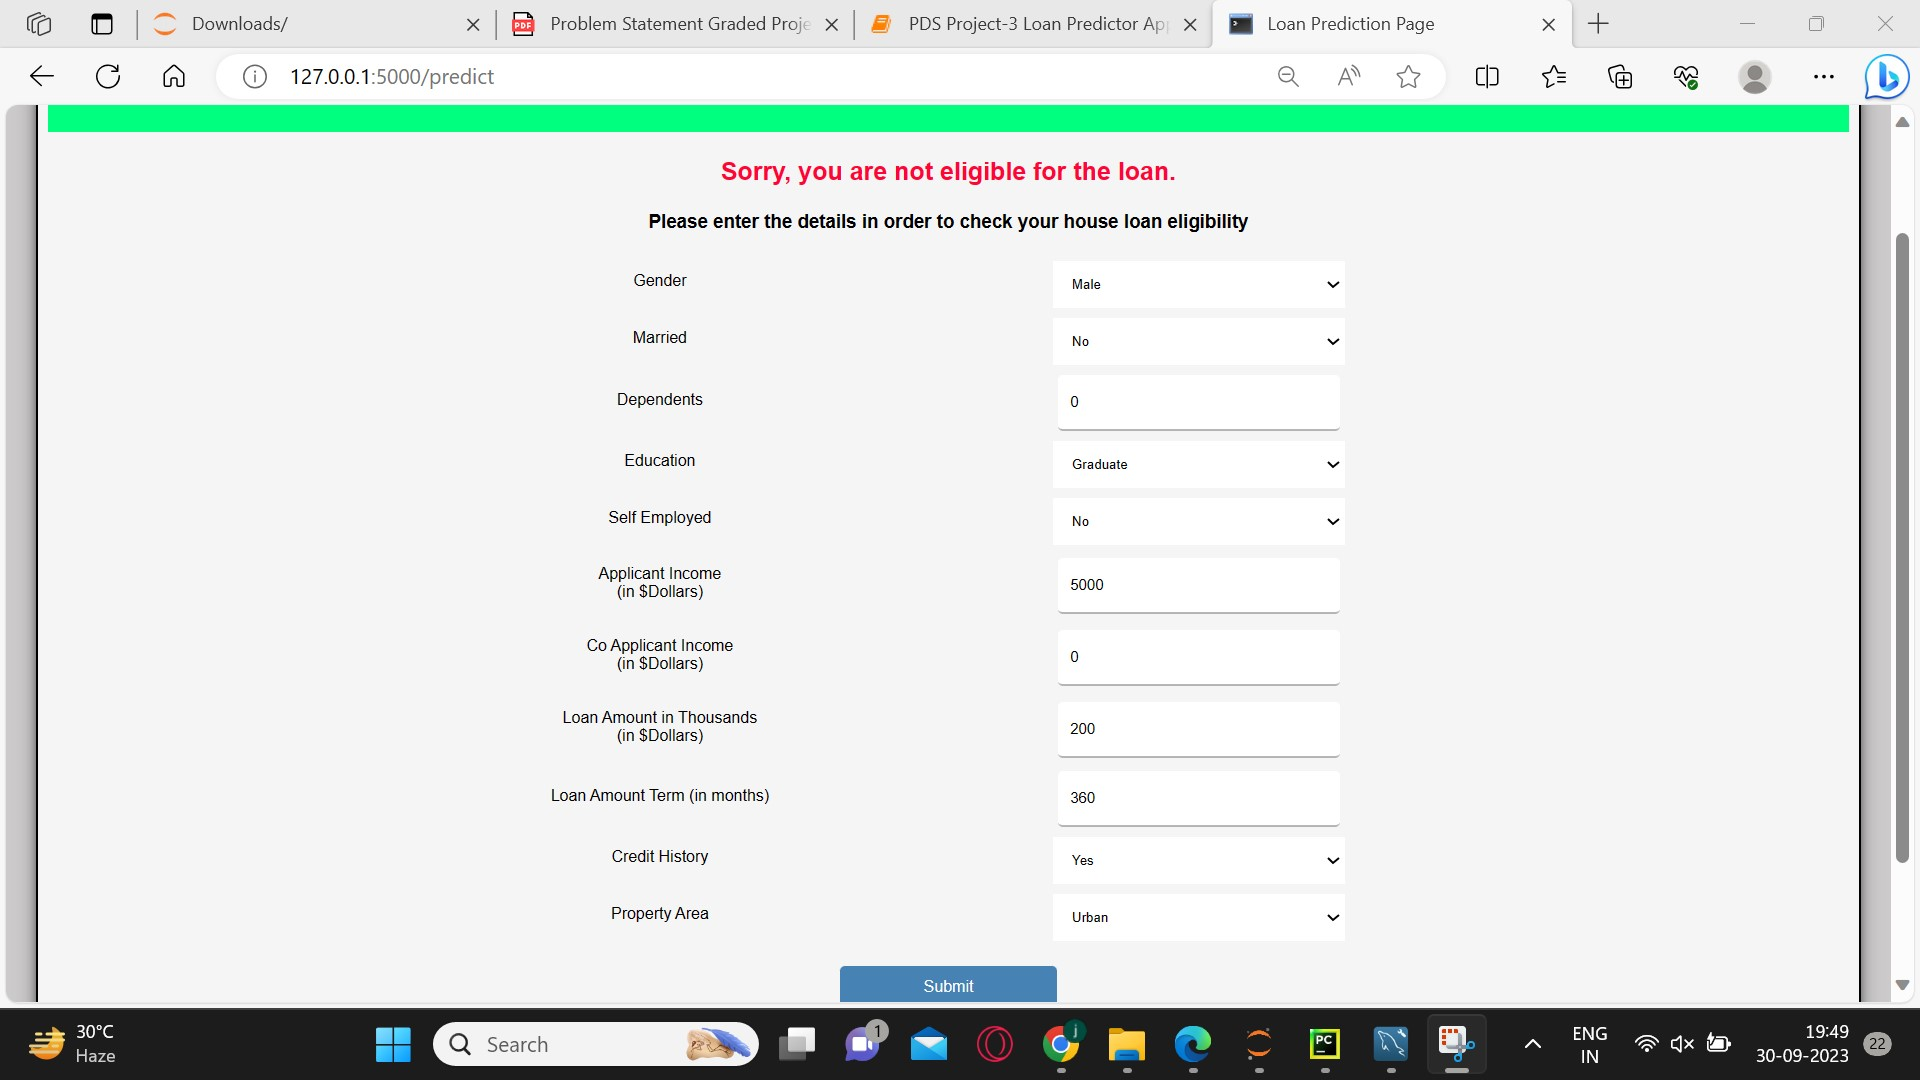

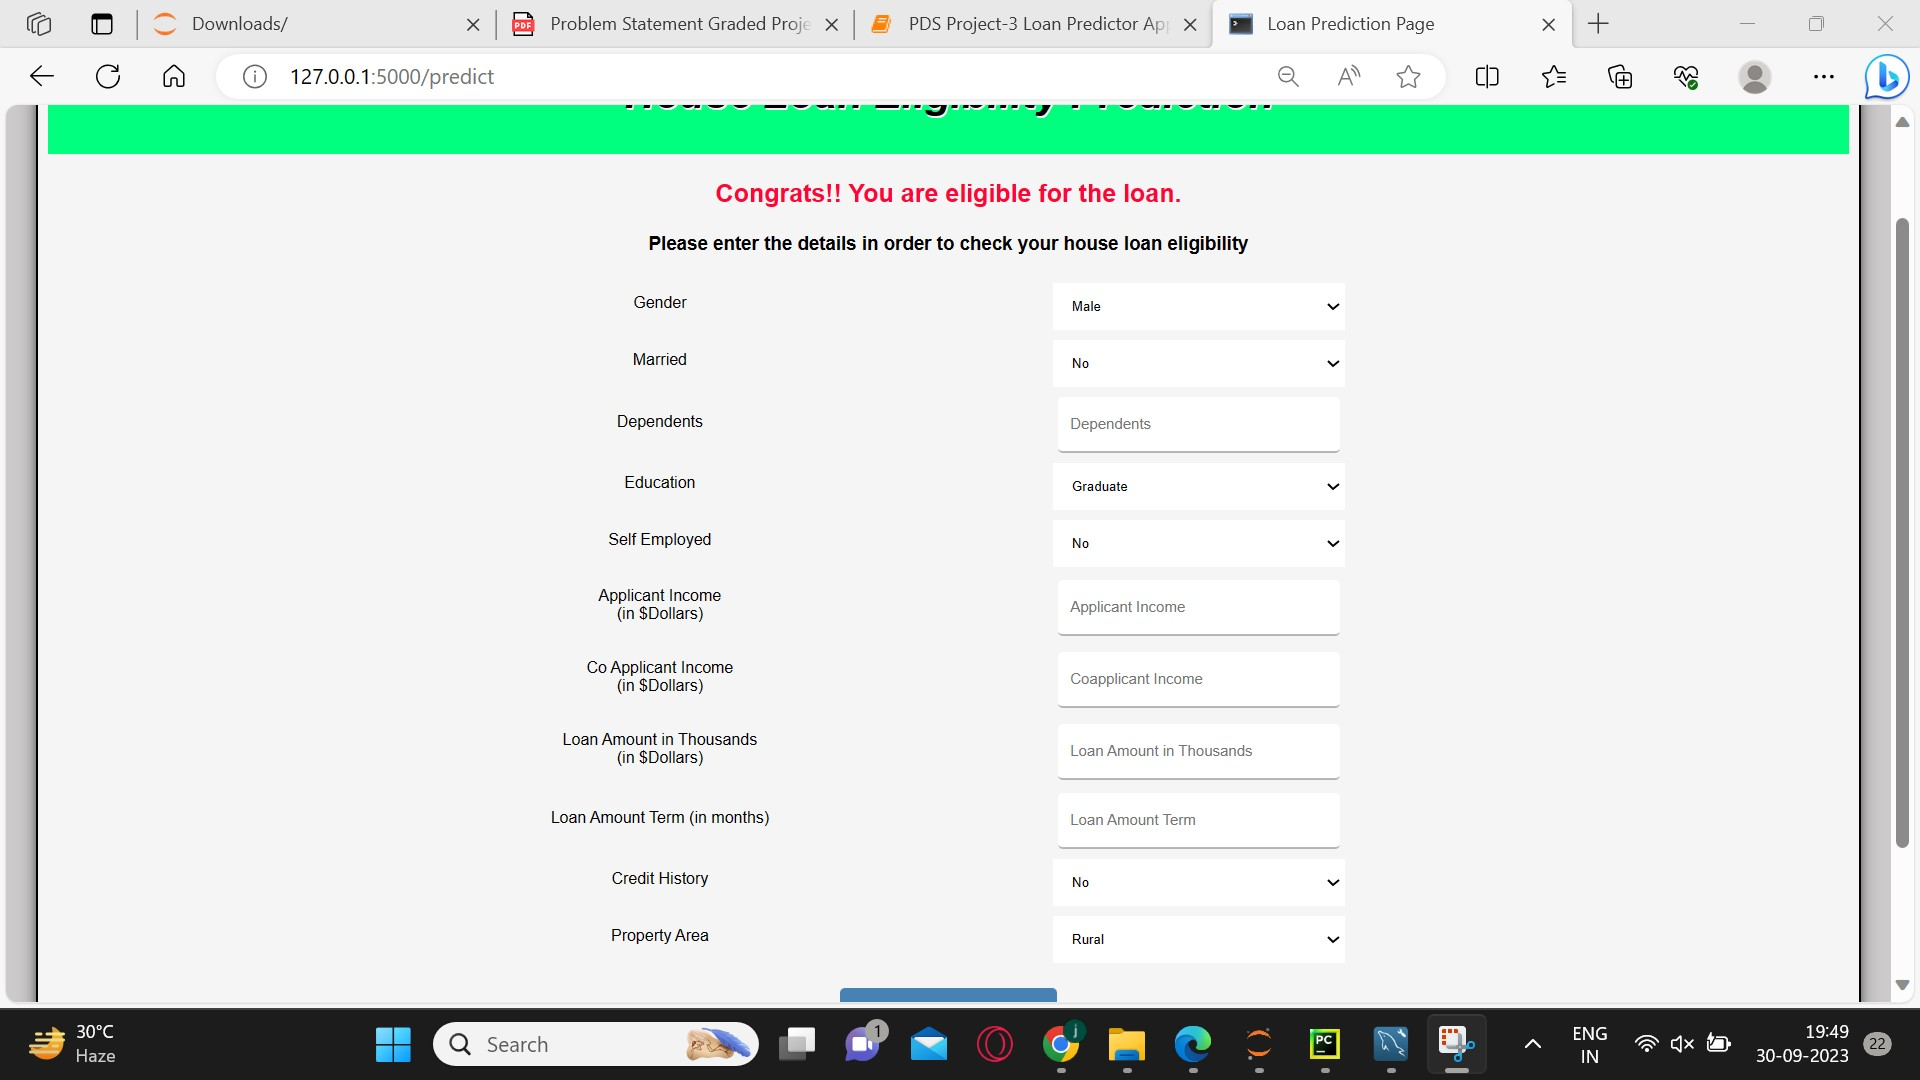

# <p style="text-align:center;"><font color='cyan'>Thank You.</font></p>